In [1]:
print("start import")
import time
time1 = time.time()
import torch
from torch_geometric.data import Data # 从torch_geometric.data导入Data类，用于表示图数据
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn.functional as F
import torch.nn as nn

time2 = time.time()
print("import used time: ", time2 - time1)
print(f"当前时间: {time.strftime('%m-%d %H:%M:%S', time.localtime())}")

start import
import used time:  6.1263346672058105
当前时间: 11-28 03:08:13


In [3]:
from BTNHGV2HeteroDataClass import BTNHGV2HeteroDataClass
import sys
import importlib
importlib.reload(sys.modules['BTNHGV2HeteroDataClass'])
from BTNHGV2ParameterClass import BTNHGV2ParameterClass
from BTNHGV2HeteroDataClass import BTNHGV2HeteroDataClass
heteroDataClass=BTNHGV2HeteroDataClass()

start construct HeteroData
start read data
读取数据用时: 3.1737372875213623
当前时间: 11-28 03:08:57
construct ID map and 构建节点特征矩阵
构建边关系
构建边关系用时: 13.399739742279053
当前时间: 11-28 03:09:12
给 address 节点加标签
转成无向图
make undirected graph用时: 0.034459590911865234
当前时间: 11-28 03:09:13
当前时间: 11-28 03:09:13
类别: 0     1     2     3     4     5     6     7     8     9     10    11    12    13    
数量: 1016  1240  2692  3146  486   1632  586   116   805   188   1087  1260  357   607   


In [ ]:
import sys
import importlib
importlib.reload(sys.modules['BTNHGV2HeteroDataClass'])
from BTNHGV2HeteroDataClass import BTNHGV2HeteroDataClass


类别: 0     1     2     3     4     5     6     7     8     9     10    11    12    13    
数量: 1016  1240  2692  3146  486   1632  586   116   805   188   1087  1260  357   607   
划分数据集信息
训练集大小: 12174 (80.00%)
测试集大小: 3044 (20.00%)
划分数据集用时: 0.02138829231262207
当前时间: 11-28 02:51:17


(tensor([False, False, False,  ..., False, False, False]),
 tensor([False, False, False,  ..., False, False, False]))

划分数据集信息
训练集大小: 12174 (80.00%)
测试集大小: 3044 (20.00%)
划分数据集用时: 0.01805734634399414
当前时间: 11-28 03:09:42
using device: cuda
start train
Epoch 004 | Loss: 2.5507
Epoch 008 | Loss: 2.4286
Epoch 012 | Loss: 2.3378
Epoch 016 | Loss: 2.2768
Epoch 020 | Loss: 2.2374
Epoch 024 | Loss: 2.1958
Epoch 028 | Loss: 2.1465
Epoch 032 | Loss: 2.1357
Epoch 036 | Loss: 2.1026
Epoch 040 | Loss: 2.0526
Epoch 044 | Loss: 2.0849
Epoch 048 | Loss: 2.0413
Epoch 052 | Loss: 2.0387
Epoch 056 | Loss: 1.9901
Epoch 060 | Loss: 1.9589
Epoch 064 | Loss: 2.1325
训练完成, epoch : 64, loss: 2.1325
start test
Accuracy: 0.1882
Average confidence: 0.2313
Balanced Accuracy: 0.2763
类别: 0     1     2     3     4     5     6     7     8     9     10    11    12    13    
数量: 1016  1240  2692  3146  486   1632  586   116   805   188   1087  1260  357   607   
当前时间: 11-28 03:10:48


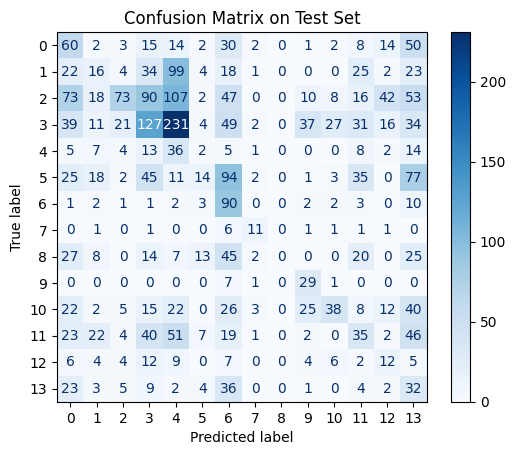

(0.18823915900131405, 0.23130430281162262)

In [4]:
from ModelTrainerClass import ModelTrainerClass
from BTNHGV2ParameterClass import BTNHGV2ParameterClass
from BTNHGV2HeteroDataClass import BTNHGV2HeteroDataClass
from HAN import HAN
import sys
import importlib
importlib.reload(sys.modules['ModelTrainerClass'])
importlib.reload(sys.modules['BTNHGV2ParameterClass'])
importlib.reload(sys.modules['HAN'])
importlib.reload(sys.modules['BTNHGV2HeteroDataClass'])
from BTNHGV2ParameterClass import BTNHGV2ParameterClass
from BTNHGV2HeteroDataClass import BTNHGV2HeteroDataClass
from ModelTrainerClass import ModelTrainerClass
from HAN import HAN
gmodel=HAN(heteroDataCls=heteroDataClass)

trainer=ModelTrainerClass(model=gmodel)
trainer.run()
trainer.test()